<a href="https://colab.research.google.com/github/prajwalccc13/Books4U-Book-Reseller/blob/master/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
import random
from PIL import Image, ImageEnhance
from tqdm import tqdm
import numpy as np
import pandas as pd


In [3]:
# Folder path to the dataset
folder_path = '/content/drive/MyDrive/CoinImages'

# add all the countries being used for training
COUNTRIES = [
    'Japan',
    'Nepal',
    'United Kingdom',
    'New Zealand'
]

# add all the preprocessed folders here
EXCLUDED_FOLDERS = [
    'Preprocessed_Images',
    'Only_Preprocessed_Images',
    'New_Preprocessed_Images'
]

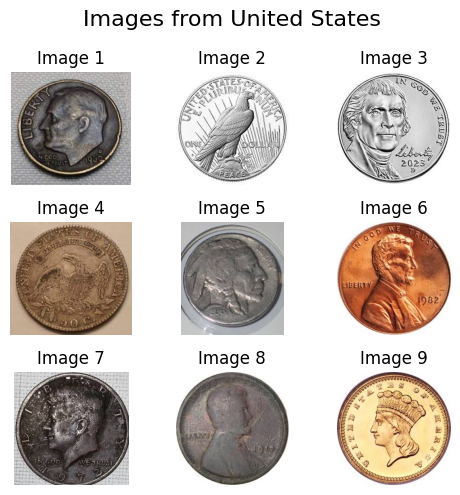

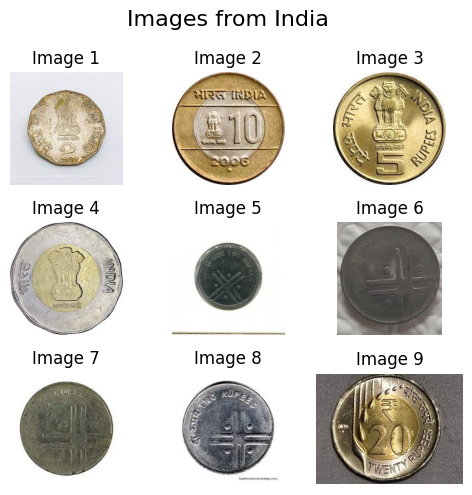

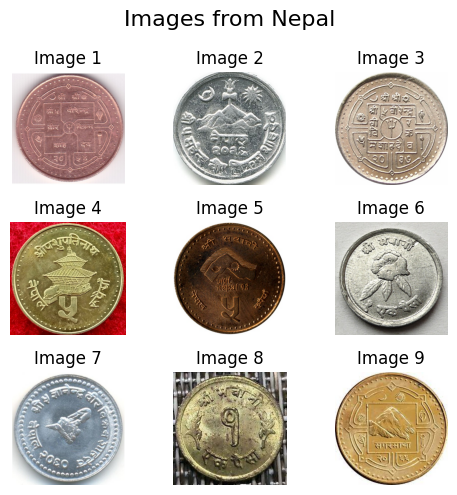

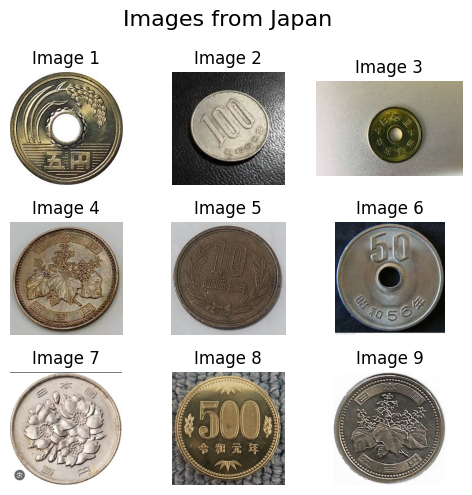

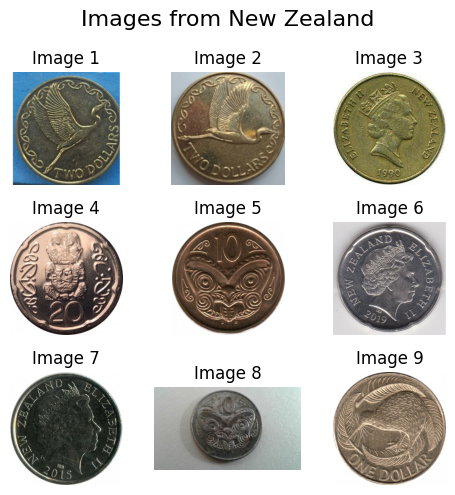

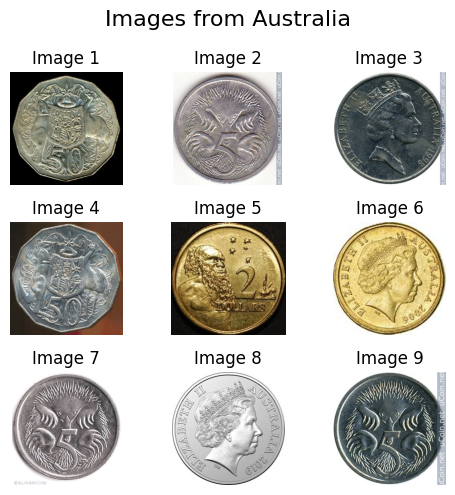

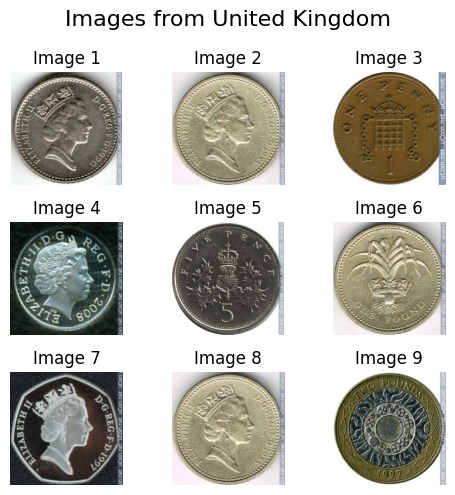

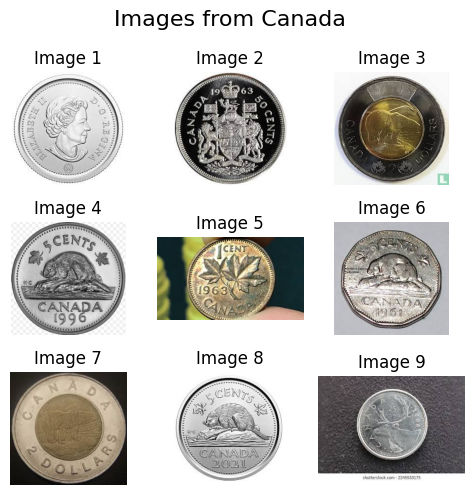

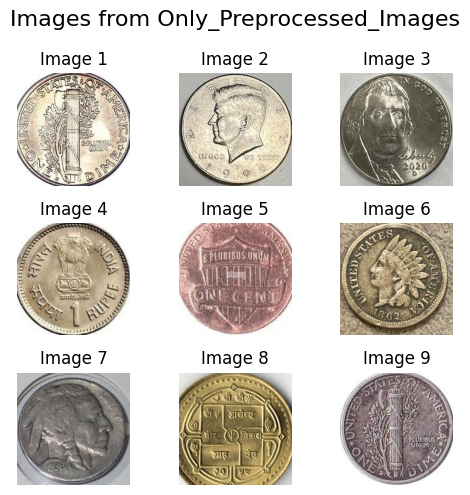

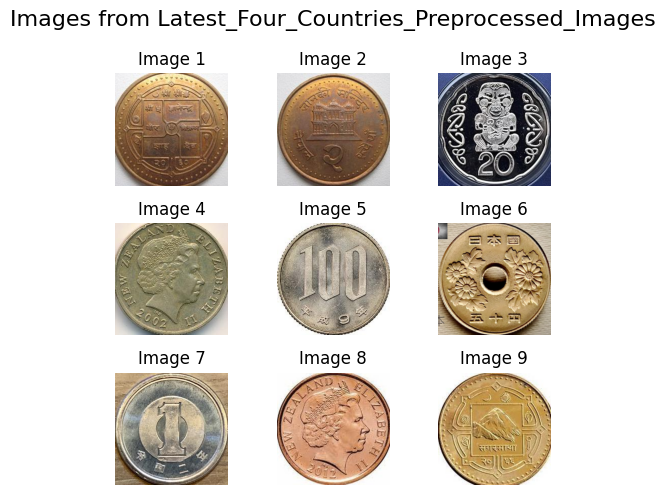

In [4]:
#Prerequisite for this cell: Right click on CoinImages in drive. Organize and then add short cut to My Drive
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

country_folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

# Loop through each country folder
for country in country_folders:
    country_path = os.path.join(folder_path, country)

    # Collect all images from this country's subfolders
    image_files = []
    for root, _, files in os.walk(country_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                image_files.append(os.path.join(root, file))

    # If no images found, skip this country
    if len(image_files) == 0:
        print(f"No images found for {country}")
        continue

    # Select 9 random images (or fewer if less than 9 exist)
    random_images = random.sample(image_files, min(9, len(image_files)))

    # Display images in a 3x3 grid
    fig, axes = plt.subplots(3, 3, figsize=(5, 5))
    fig.suptitle(f"Images from {country}", fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i < len(random_images):
            img_path = random_images[i]
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax.imshow(img)
            ax.set_title(f"Image {i+1}")
        ax.axis("off")  # Hide axes if no image

    plt.tight_layout()
    plt.show()

## Make csv file (DO NOT RUN UNTIL MAJOR CHANGES IN THE DATSET):

In [ ]:
def make_csv_dataset(folder_path, excluded_folders):
  """
  Make a CSV file for all the info of the dataset.

  Arguments:
  folder_path [str]: the path of the folder to the dataset
  excluded_folders [list]: list of folders [str] to be excluded

  Returns:
  df [dataframe]: all the information related to a image files
  ["country", "denomination", "image_path", "width", "height"]

  """

  image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

  country_folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
  country_folders = [country for country in country_folders if country not in excluded_folders]

  data = []
  # Loop through each country folder
  for country in country_folders:
      country_path = os.path.join(folder_path, country)

      # Collect all images from this country's subfolders
      image_files = []
      for root, _, files in os.walk(country_path):
          for file in files:
              if file.lower().endswith((".jpg", ".jpeg", ".png")):
                try:
                  img = Image.open(os.path.join(root, file))
                  width, height = img.size
                  data.append([country, root.split('/')[-1], file, width, height])
                except:
                  pass

  df = pd.DataFrame(data, columns=["country", "denomination", "image_path", "width", "height"])
  return df




In [ ]:
folder_path = "/content/drive/My Drive/CoinImages"
excluded_folders = ['Preprocessed_Images', 'Only_Preprocessed_Images', 'New_Preprocessed_Images']

df = make_csv_dataset(folder_path, excluded_folders)

In [ ]:
df[df['country'] == 'Nepal']['denomination'].value_counts()

,count
denomination,
1 Nepali Paisa,48
2 Nepali Rupee,34
1 Nepali Rupee,34
25 Nepali Paisa,32
5 Nepali Rupee,32


In [ ]:
df.to_csv(os.path.join(folder_path, 'coins_dataset.csv'), index=False)

## Explore Based on Country And Denomination

In [ ]:
csv_path = os.path.join(folder_path, 'coins_dataset.csv')
df = pd.read_csv(csv_path)

In [ ]:
def count_by_country(df):
  return df['country'].value_counts()

In [ ]:
count_by_country(df)

,count
country,
United Kingdom,366
Australia,194
Canada,184
Nepal,180
United States,172
New Zealand,162
Japan,154
India,138


## Count Number of Denomination in each country

In [ ]:
def count_denomination_by_country(df, countries):
  return df.groupby(['country', 'denomination'])[['country', 'denomination']].value_counts()

In [ ]:
count_denomination_by_country(df, COUNTRIES)

country         denomination   
Australia       AUD 1 Dollar       34
                AUD 10 Cents       34
                AUD 2 Dollar       34
                AUD 20 Cents       30
                AUD 5 Cents        33
                AUD 50 Cents       29
Canada          1 cent             26
                1 dollar           26
                10 cents           26
                2 dollars          26
                25 cents           26
                5 cents            28
                50 cents           26
India           INR 10Rs           26
                INR 1Re            31
                INR 20Rs           25
                INR 2Rs            26
                INR 5Rs            30
Japan           1 Yen              25
                10 Yen             26
                100 Yen            26
                5 Yen              25
                50 Yen             26
                500 Yen            26
Nepal           1 Nepali Paisa     48
                1 Nepali Rupee     34
                2  Nepali Rupee    34
                25 Nepali Paisa    32
                5  Nepali Rupee    32
New Zealand     NZ 10 c            34
                NZ 20 c            32
                NZ 50 c            32
                NZ Dollar 1        32
                NZ Dollar 2        32
United Kingdom  GBP 1 Penny        35
                GBP 1 Pound        60
                GBP 10 Pence       36
                GBP 2 Pence        35
                GBP 2 Pound        58
                GBP 20 Pence       60
                GBP 5 Pence        36
                GBP 50 Pence       46
United States   USD 1$             30
                USD 10¢            26
                USD 1¢             28
                USD 25¢            26
                USD 50¢            30
                USD 5¢             32
Name: count, dtype: int64

## Explore based on Different Denomination

Loop over all the countries

In [ ]:
def count_by_country_denomination(df, country):
  return df[df['country'] == country]['denomination'].value_counts()

In [ ]:
for country in COUNTRIES:
  print(count_by_country_denomination(df, country))
  print('----------------------')

denomination
500 Yen    26
50 Yen     26
10 Yen     26
100 Yen    26
5 Yen      25
1 Yen      25
Name: count, dtype: int64
----------------------
denomination
1 Nepali Paisa     48
2  Nepali Rupee    34
1 Nepali Rupee     34
25 Nepali Paisa    32
5  Nepali Rupee    32
Name: count, dtype: int64
----------------------
denomination
GBP 1 Pound     60
GBP 20 Pence    60
GBP 2 Pound     58
GBP 50 Pence    46
GBP 5 Pence     36
GBP 10 Pence    36
GBP 1 Penny     35
GBP 2 Pence     35
Name: count, dtype: int64
----------------------
denomination
NZ 10 c        34
NZ Dollar 2    32
NZ 20 c        32
NZ Dollar 1    32
NZ 50 c        32
Name: count, dtype: int64
----------------------


## Create Data Loader (UPDATED)

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torchvision import datasets, transforms

from torch.utils.data import Dataset, DataLoader
import json
from PIL import Image

from sklearn.model_selection import train_test_split

In [83]:
# Check for GPU
if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

In [84]:
class COINS(Dataset):
  def __init__(self, data, split='train', image_size=(128, 128)):
    super().__init__()

    self.split = split

    self.classes = pd.unique(data['class'])

    self.class_to_idx = dict(zip(self.classes, range(len(self.classes))))

    self.image_data_folder = data['URL']
    self.labels_name = data['class']

    # Read the file names and labels
    self.labels = []
    self.image_files = []

    for index in data.index:
      self.labels.append(self.class_to_idx[data.loc[index, 'class']])
      self.image_files.append(os.path.join(data.loc[index, 'URL'], data.loc[index, 'image name']))


    if split == "train":
      self.transform = transforms.Compose([
          transforms.Resize(image_size),
          transforms.RandomHorizontalFlip(),
          transforms.RandomRotation(10),
          transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
          transforms.RandomResizedCrop(64, scale=(0.8, 1.0), ratio=(0.9, 1.1)),
          transforms.ToTensor(),
          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
      ])
    else:
      self.transform=transforms.Compose([
          transforms.Resize(image_size),
          transforms.ToTensor(),
          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
      ])

  def __len__(self):
      return len(self.image_files)

  def __getitem__(self, idx):
      image_file, label = self.image_files[idx], self.labels[idx]
      image = Image.open(image_file)
      transformed_image = self.transform(image)

      return transformed_image, label


In [85]:
# add csv file in root folder
data = pd.read_csv('preprocessed_imgs.csv')
train, test_val = train_test_split(data, test_size=0.3, random_state=42)
test, val = train_test_split(test_val, test_size=0.5, random_state=42)

In [86]:
train_dataset = COINS(train, split='train', image_size=(128, 128))
test_dataset = COINS(test, split='test', image_size=(128, 128))
val_dataset = COINS(val, split='val', image_size=(128, 128))

In [87]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)